We will be training a KNN classifier on the Large Movie Review dataset from (https://www.kaggle.com/datasets/jcblaise/imdb-sentiments?select=train.csv)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Separate features (X) and target (y)
X_train_text = train['text'].fillna('') # Fill NaN with empty string
y_train = train['sentiment']
X_test_text = test['text'].fillna('') # Fill NaN with empty string

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit the vectorizer on the training text data and transform it
X_train = vectorizer.fit_transform(X_train_text)

# Transform the test text data
X_test = vectorizer.transform(X_test_text)


# Create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

Prediction for test example 0: 1


 Exploring the probabilities outputted by logistic regression on a subset of the Large Movie Review Dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Reuse the vectorizer from the previous cell
X= vectorizer.fit_transform(train['text'].fillna(''))
y = train['sentiment']

# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X,y)

# Predict sentiment for a glowing review
review1 = "This movie was so good!!."
review1_features = vectorizer.transform([review1]) # Use the vectorizer to transform the review
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = vectorizer.transform([review2]) # Use the vectorizer to transform the review
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

Review: This movie was so good!!.
Probability of positive review: 0.5144799517108338
Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
Probability of positive review: 0.8093208190276516


The use of the word "good' tipped of the sentiment analayis in favor of posotive for the second review

Visualizing the decision boundaries of various classifier types.

A subset of scikit-learn's built-in wine dataset is used for this

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_4_classifiers(X, y, classifiers):
    # Set-up 2x2 grid for plotting.
    fig, axes = plt.subplots(2, 2)
    for clf, ax in zip(classifiers, axes.flatten()):
        # Plot the decision boundary and data points.
        plot_decision_boundary(X, y, clf, ax)

        # Set the title
        title = type(clf).__name__
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

def plot_decision_boundary(X, y, clf, ax):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

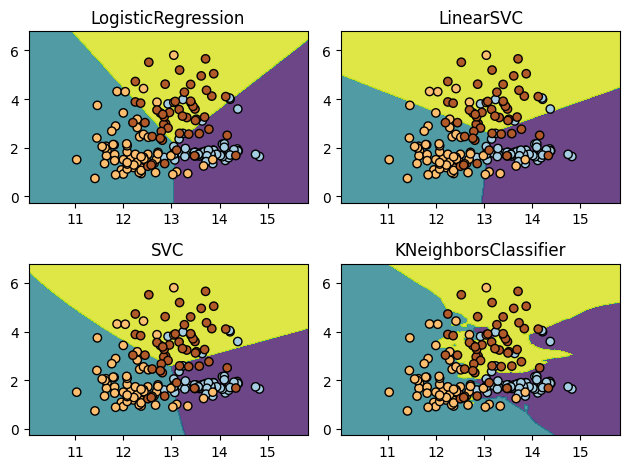

Classifiers fitted successfully.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Load the wine dataset
wine = load_wine()
X = wine.data[:, [0, 1]] # Using only the first two features for visualization
y = wine.target

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers) # This function is not defined yet
plt.show() # This will cause an error without the plotting function
print("Classifiers fitted successfully.")